## Data Handling in PyTorch

One of the most important parts of any machine learning pipeline is data handling, i.e. providing an iterface between data on the hard drive and the DL algorithm.


We typically can't load all the data in the RAM at once as the data in DL application is prohibitively large. And we don't need all the data a single time, anyway, for algorithms like Batch/Sotchastic gradient decent.

PyTorch provides dataloader to effictively load the data and provide a pipeline from data to the DL algorithm.

Below we will look at an example of a dataloader written in PyTorch.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision.datasets import MNIST
from torchvision import transforms
from torchvision.datasets import MNIST
import pandas as pd
from time import sleep

%matplotlib inline

We will be using MNIST Disgits datasets. The MNIST Digits dataset consists of 70000 28x28 grayscale images of digits from 0 to 9, with 6000 images per class. There are 60000 training images and 10000 test images. <br>

Following are the some random samples from the dataset.

![MNIST Samples](https://www.yunzhew.com/project/mnist-digit-net/featured_hudee2c27f78ea2485e0d3aa44abbfc53c_218555_720x2500_fit_q75_h2_lanczos_3.webp)

We will use pytorch datasets to fetch the MNIST Digits dataset as it provides a handy way to get and use the dataset. More information about pytorch datasets [here](https://pytorch.org/vision/stable/datasets.html).

## Datasets & Dataloaders

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

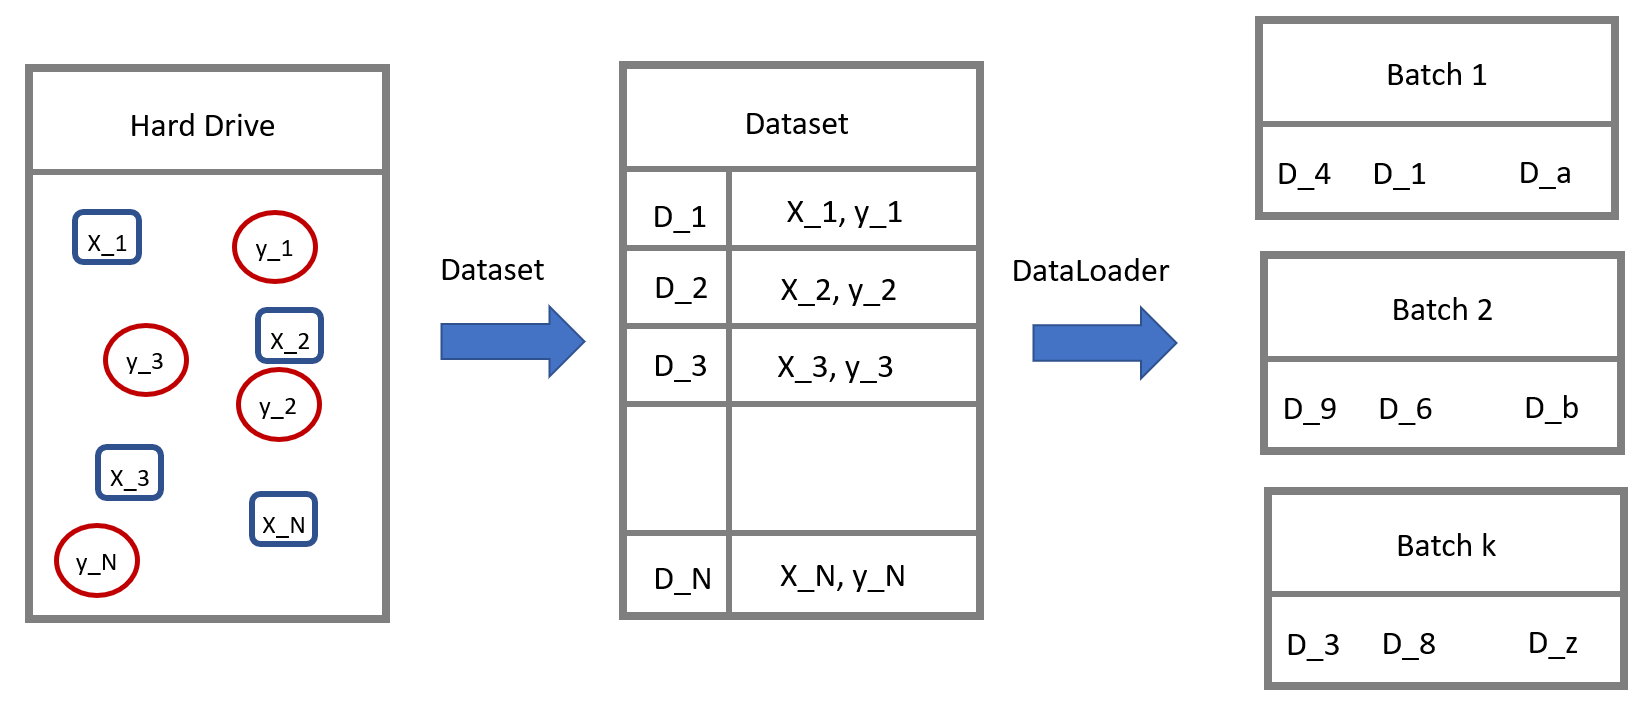

In [10]:
train_dataset = MNIST(root='./datasets', train=True, download=True, transform = transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle=True)


test_dataset = MNIST(root='./datasets', train=False, download=True, transform = transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle=False)

In [11]:
print(len(train_dataset))
print(len(train_loader))

60000
938


In [12]:
for x,y in test_loader:
  print(x.shape)
  print(y.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size

## Custom Datasets

In [13]:
!wget -O data.zip https://www.dropbox.com/sh/eo3ngz5bno9vxkq/AACZzrvhQiXsBc1lKMw6H5ida?dl=0

--2024-02-26 08:43:24--  https://www.dropbox.com/sh/eo3ngz5bno9vxkq/AACZzrvhQiXsBc1lKMw6H5ida?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/eo3ngz5bno9vxkq/AACZzrvhQiXsBc1lKMw6H5ida [following]
--2024-02-26 08:43:25--  https://www.dropbox.com/sh/raw/eo3ngz5bno9vxkq/AACZzrvhQiXsBc1lKMw6H5ida
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca5acf7f195395f4a0500e18f0c.dl-eu.dropboxusercontent.com/zip_download_get/BxZ7PEo4vbVbbkxmNvlwCKBd9knZnI968G2ASxxFSRpJDS-Fk3cLyUjG6N8IEjTx7s2-BLkvobDxdBxbAWcSnPDTRV_lu6nDesdVyPNgD04akw# [following]
--2024-02-26 08:43:26--  https://uca5acf7f195395f4a0500e18f0c.dl-eu.dropboxusercontent.com/zip_download_get/BxZ7PEo4vbVbbkxmNvlwCKBd9knZnI968G2ASxxFSRpJDS-Fk3cLyUjG6N8IEjTx7s2-BLkvobDxdBxbAWcSnP

In [14]:
!unzip data.zip

Archive:  data.zip
mapname:  conversion of  failed
 extracting: images.zip              
 extracting: labels.csv              


In [15]:
!unzip images.zip

Archive:  images.zip
   creating: content/images/
  inflating: content/images/205.jpg  
  inflating: content/images/29.jpg   
  inflating: content/images/235.jpg  
  inflating: content/images/178.jpg  
  inflating: content/images/27.jpg   
  inflating: content/images/105.jpg  
  inflating: content/images/34.jpg   
  inflating: content/images/106.jpg  
  inflating: content/images/297.jpg  
  inflating: content/images/282.jpg  
  inflating: content/images/93.jpg   
  inflating: content/images/89.jpg   
  inflating: content/images/142.jpg  
  inflating: content/images/199.jpg  
  inflating: content/images/201.jpg  
  inflating: content/images/152.jpg  
  inflating: content/images/277.jpg  
  inflating: content/images/209.jpg  
  inflating: content/images/275.jpg  
  inflating: content/images/11.jpg   
  inflating: content/images/162.jpg  
  inflating: content/images/165.jpg  
  inflating: content/images/289.jpg  
  inflating: content/images/65.jpg   
  inflating: content/images/241.jpg  


In [16]:
df = pd.read_csv("labels.csv")

In [17]:
df

,Unnamed: 0,Name,Labels
0,0,0.jpg,9
1,1,1.jpg,0
2,2,2.jpg,3
3,3,3.jpg,8
4,4,4.jpg,7
...,...,...,...
995,995,995.jpg,4
996,996,996.jpg,4
997,997,997.jpg,0
998,998,998.jpg,8


In [26]:
create_tensor = transforms.ToTensor()

class MyCustomDataset(Dataset):
  def __init__(self, labels_file_path, base_path, transform = False):
    self.labels_file = pd.read_csv(labels_file_path)
    self.base_path = base_path
    self.transform = transform

  def __len__(self):
    return len(self.labels_file)

  def __getitem__(self, idx):
    image_name = self.labels_file["Name"].iloc[idx]
    label = self.labels_file["Labels"].iloc[idx]

    im = Image.open(f"{self.base_path}/{image_name}").convert("L")
    im = np.array(im)

    # im = im/255.0
    im = create_tensor(im)

    if self.transform:
      im = self.transform(im)

    # return {"Data": im, "Label":label}
    return im, label

In [27]:
my_dataset = MyCustomDataset("labels.csv", "content/images")

In [28]:
len(my_dataset)

1000

In [29]:
im, label = my_dataset[0]
im.shape

torch.Size([1, 28, 28])

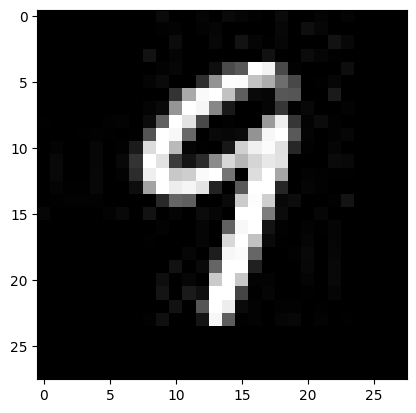

In [30]:
plt.imshow(im[0], cmap="gray")

In [31]:
data_loader = DataLoader(my_dataset, batch_size= 32, shuffle=True)

In [32]:
for x,y in data_loader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])


## DataLoaders vs No DataLoaders

Speed comparison between both


In [33]:
img_dataset = MyCustomDataset("labels.csv", "content/images")

# Let's make a dataloader first

batch_size = 64
img_loader = DataLoader(img_dataset, batch_size=batch_size, num_workers=2)

In [34]:
print('Size of img_dataloader: ', len(img_loader))  # size of dataloader is the number of batches. 500/8 = 7.8 => ceil => 8
print('Size of dataset inside img_dataloader: ', len(img_loader.dataset))

Size of img_dataloader:  16
Size of dataset inside img_dataloader:  1000


In [33]:
# Now let's make a class to iterate the dataset manually

class ImageDatasetIterator:

  def __init__(self, dataset, batch_size=1):

    self.dataset = dataset
    self.batch_size = batch_size

  def __iter__(self):

    self.batch_no = 0
    return self

  def __next__(self):

    starting_idx = self.batch_no*self.batch_size
    ending_idx = starting_idx + self.batch_size

    if starting_idx >= len(self.dataset):
      raise StopIteration

    self.batch_no += 1

    if ending_idx >= len(self.dataset):
      ending_idx = len(self.dataset)

    imgs = []
    labels = []

    for i in range(starting_idx, ending_idx):

      img, label = self.dataset[i]
      imgs.append(img)
      labels.append(label)

    return torch.stack(imgs), torch.Tensor(labels)


batch_iterator = iter(ImageDatasetIterator(img_dataset, batch_size=batch_size))

Let's see how much time difference is over 20 epochs.

We'll add 0.2 second sleep which will be placeholder for training loop functinoality

In [35]:
n_epochs = 20
sleep_time_sec = 0.2

Dataloader time

In [36]:
%%time
for epoch_no in range(n_epochs):
  for _ in img_loader:
    sleep(sleep_time_sec)
  print(f'epoch {epoch_no}')

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
CPU times: user 882 ms, sys: 817 ms, total: 1.7 s
Wall time: 1min 7s


In [37]:
%%time
for epoch_no in range(n_epochs):
  for _ in batch_iterator:
    sleep(sleep_time_sec)
  print(f'epoch {epoch_no}')

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
CPU times: user 7.28 s, sys: 505 ms, total: 7.78 s
Wall time: 1min 11s
